<a href="https://colab.research.google.com/github/prahlad-pallav/Stock_Market_Analysis/blob/main/Sales_QoQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

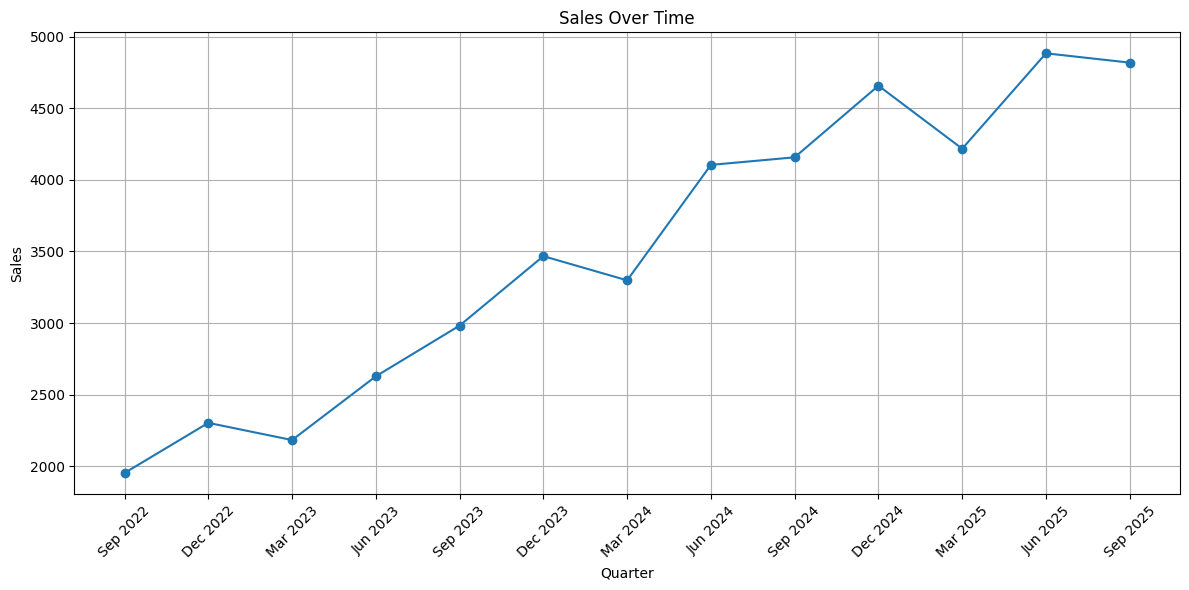

In [2]:
import matplotlib.pyplot as plt
import re

# Paste your data here
raw_text = """
Sep 2022 Dec 2022 Mar 2023 Jun 2023 Sep 2023 Dec 2023
Mar 2024 Jun 2024 Sep 2024 Dec 2024 Mar 2025 Jun 2025 Sep 2025
Sales + 1,953 2,303 2,183 2,628 2,982 3,467 3,298 4,104 4,157 4,657 4,217 4,883 4,818
"""

# 1. Extract all date strings (only month + year)
quarters = re.findall(r'\b[A-Za-z]{3}\s+\d{4}\b', raw_text)

# 2. Extract sales numbers ONLY after the word "Sales"
sales_text = raw_text.split("Sales")[1]   # take text after "Sales"
numbers = re.findall(r'\d{1,3}(?:,\d{3})*', sales_text)
sales = [int(n.replace(",", "")) for n in numbers]

# Ensure first 13 values (in case extra text exists)
sales = sales[:13]

# Plot
plt.figure(figsize=(12,6))
plt.plot(quarters, sales, marker='o')
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Sales Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


Average Sales by Quarter: {'Sep': np.float64(15741.75), 'Dec': np.float64(18832.0), 'Mar': np.float64(18046.0), 'Jun': np.float64(18916.666666666668)}

Best Quarter (by average across years): Jun → 18916.666666666668
Worst Quarter (by average across years): Sep → 15741.75


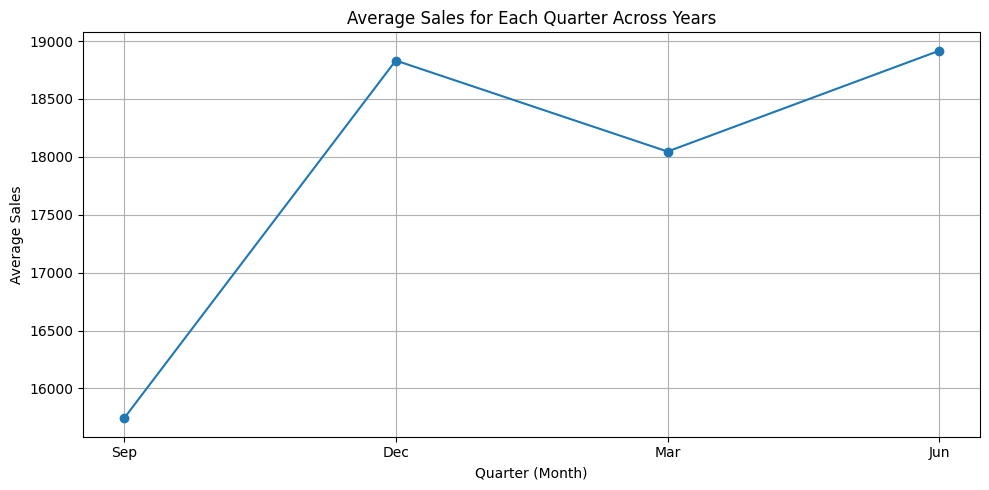

In [14]:
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import numpy as np

# Paste your data here (any length, any values)
raw_text = """
Sep 2022	Dec 2022	Mar 2023	Jun 2023	Sep 2023	Dec 2023	Mar 2024	Jun 2024	Sep 2024	Dec 2024	Mar 2025	Jun 2025	Sep 2025
Sales +	12,498	14,933	14,161	16,683	14,944	19,452	17,825	19,571	16,970	22,111	22,152	20,496	18,555
"""

# ---- 1. Extract MMM YYYY ----
quarters = re.findall(r'\b[A-Za-z]{3}\s+\d{4}\b', raw_text)

# ---- 2. Extract sales numbers ----
sales_text = raw_text.split("Sales", 1)[1]
sales_numbers = re.findall(r'\d{1,3}(?:,\d{3})*', sales_text)
sales = [int(x.replace(",", "")) for x in sales_numbers]
sales = sales[:len(quarters)]

# ---- 3. Group sales by quarter name (ex: "Mar", "Jun", etc.) ----
quarter_groups = defaultdict(list)

for q, s in zip(quarters, sales):
    month = q.split()[0]          # "Mar" from "Mar 2023"
    quarter_groups[month].append(s)

# ---- 4. Compute average for each quarter type ----
avg_by_quarter = {month: np.mean(values) for month, values in quarter_groups.items()}

# ---- 5. Determine best and worst average quarter ----
best_quarter = max(avg_by_quarter, key=avg_by_quarter.get)
worst_quarter = min(avg_by_quarter, key=avg_by_quarter.get)

print("Average Sales by Quarter:", avg_by_quarter)
print("\nBest Quarter (by average across years):", best_quarter, "→", avg_by_quarter[best_quarter])
print("Worst Quarter (by average across years):", worst_quarter, "→", avg_by_quarter[worst_quarter])

# ---- 6. Plot average performance by quarter ----
plt.figure(figsize=(10,5))
plt.plot(list(avg_by_quarter.keys()), list(avg_by_quarter.values()), marker='o')
plt.xlabel("Quarter (Month)")
plt.ylabel("Average Sales")
plt.title("Average Sales for Each Quarter Across Years")
plt.grid(True)
plt.tight_layout()
plt.show()


Average Growth Rate by Quarter: {'Dec': np.float64(-5.03771296490272), 'Mar': np.float64(7.36561065404906), 'Jun': np.float64(3.1357600374733754), 'Sep': np.float64(14.292779782156046)}

Best Quarter (highest average growth %): Sep → 14.292779782156046 %
Worst Quarter (lowest average growth %): Dec → -5.03771296490272 %


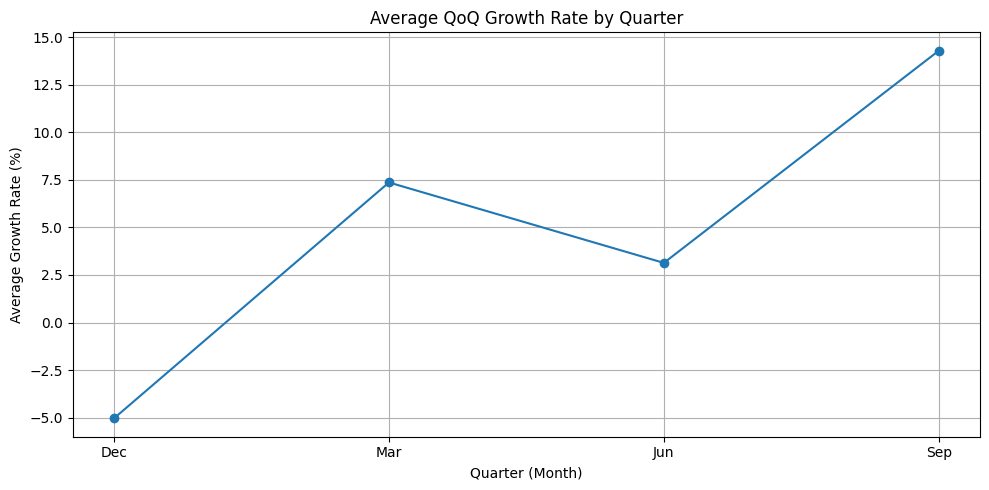

In [29]:
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import numpy as np

# Paste your data here
raw_text = """
Sep 2022	Dec 2022	Mar 2023	Jun 2023	Sep 2023	Dec 2023	Mar 2024	Jun 2024	Sep 2024	Dec 2024	Mar 2025	Jun 2025	Sep 2025
Sales +	745	749	826	808	1,048	1,059	1,357	1,405	1,515	1,262	1,056	1,141	1,202
"""

# ---- 1. Extract MMM YYYY ----
quarters = re.findall(r'\b[A-Za-z]{3}\s+\d{4}\b', raw_text)

# ---- 2. Extract sales numbers ----
sales_text = raw_text.split("Sales", 1)[1]
sales_numbers = re.findall(r'\d{1,3}(?:,\d{3})*', sales_text)
sales = [int(x.replace(",", "")) for x in sales_numbers]
sales = sales[:len(quarters)]

# ---- 3. Compute QoQ % growth: ((new-old)/old)*100 ----
growth_rates = []
growth_months = []

for i in range(1, len(sales)):
    rate = ((sales[i] - sales[i-1]) / sales[i-1]) * 100
    growth_rates.append(rate)
    growth_months.append(quarters[i].split()[0])   # month of the new quarter

# ---- 4. Group growth rate by quarter (Mar, Jun, Sep, Dec) ----
growth_groups = defaultdict(list)

for month, rate in zip(growth_months, growth_rates):
    growth_groups[month].append(rate)

# ---- 5. Compute average growth rate for each quarter ----
avg_growth_by_quarter = {m: np.mean(v) for m, v in growth_groups.items()}

# ---- 6. Best/Worst quarter by growth rate ----
best_quarter = max(avg_growth_by_quarter, key=avg_growth_by_quarter.get)
worst_quarter = min(avg_growth_by_quarter, key=avg_growth_by_quarter.get)

print("Average Growth Rate by Quarter:", avg_growth_by_quarter)
print("\nBest Quarter (highest average growth %):", best_quarter, "→", avg_growth_by_quarter[best_quarter], "%")
print("Worst Quarter (lowest average growth %):", worst_quarter, "→", avg_growth_by_quarter[worst_quarter], "%")

# ---- 7. Plot average growth by quarter ----
plt.figure(figsize=(10,5))
plt.plot(list(avg_growth_by_quarter.keys()), list(avg_growth_by_quarter.values()), marker='o')
plt.xlabel("Quarter (Month)")
plt.ylabel("Average Growth Rate (%)")
plt.title("Average QoQ Growth Rate by Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()
